In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("datasets/realistic_bacterial_disease_data.csv")

In [8]:
df.head()

,fever,cough,fatigue,headache,nausea,abdominal_pain,sore_throat,skin_rash,shortness_of_breath,chills,...,bad_breath,difficulty_urinating,hearing_loss,painful_skin,open_wounds,swelling,crusting_skin,pus_discharge,throat_tightness,disease
0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,bacterial_pneumonia
1,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,bacterial_pneumonia
2,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,bacterial_pneumonia
3,0,0,0,1,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,bacterial_pneumonia
4,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,bacterial_pneumonia


In [9]:
df.shape

(3000, 86)

In [10]:
len(df['disease'].unique())

30

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [12]:
X = df.drop('disease', axis=1)
y = df['disease']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [13]:
Y

array([ 3,  3,  3, ..., 10, 10, 10], shape=(3000,))

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")

SVC Accuracy: 1.0
SVC Confusion Matrix:
[[32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  

In [15]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [20]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [21]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [22]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [13]
Actual Disease : 13


C:\Users\Saks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [23]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [0]
Actual Disease : 0


C:\Users\Saks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [23]:
# Import libraries
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("datasets/enhanced_resistance_data_balanced.csv")

# Separate features and target
X = data.drop(columns=["Resistance_Level"])
y = data["Resistance_Level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up Random Forest model and hyperparameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Grid search for best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model, scaler, and feature names
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump({"model": best_rf, "feature_names": X.columns.tolist()}, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.8308080808080808
Classification Report:
               precision    recall  f1-score   support

Intermediate       0.87      0.90      0.88       660
   Resistant       0.83      0.82      0.82       660
 Susceptible       0.79      0.78      0.78       660

    accuracy                           0.83      1980
   macro avg       0.83      0.83      0.83      1980
weighted avg       0.83      0.83      0.83      1980



Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Model Accuracy: 0.8308080808080808

Classification Report:
               precision    recall  f1-score   support

Intermediate       0.87      0.90      0.88       660
   Resistant       0.83      0.82      0.82       660
 Susceptible       0.79      0.78      0.78       660

    accuracy                           0.83      1980
   macro avg       0.83      0.83      0.83      1980
weighted avg       0.83      0.83      0.83      1980



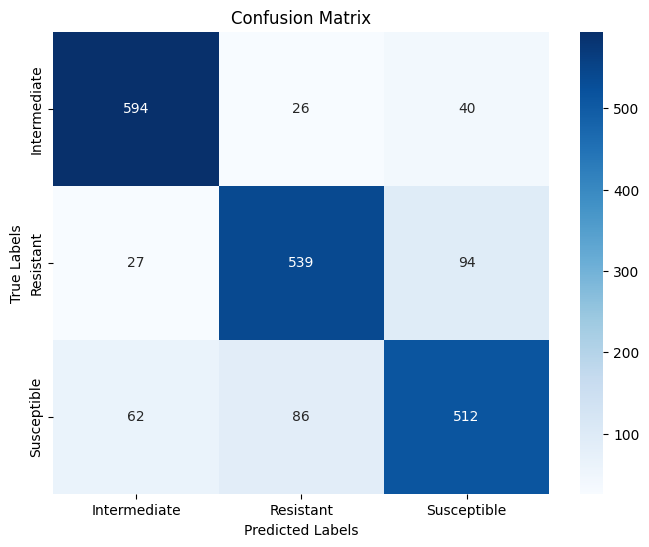

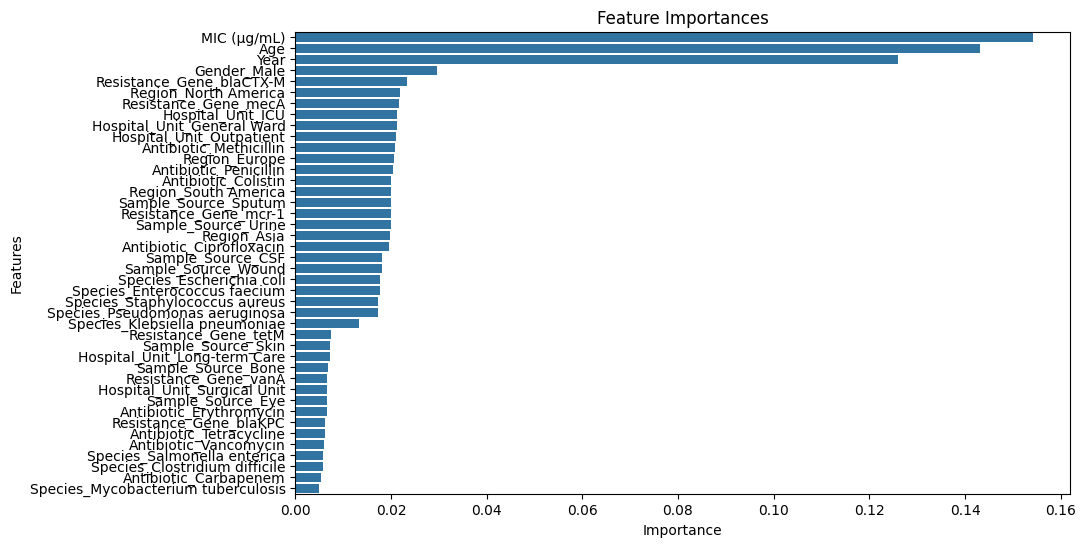

C:\Users\Saks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Test Case 1: Single Sample Prediction
Input Features:
Species_Clostridium difficile         0.000000
Species_Enterococcus faecium          0.000000
Species_Escherichia coli              1.000000
Species_Klebsiella pneumoniae         0.000000
Species_Mycobacterium tuberculosis    0.000000
Species_Pseudomonas aeruginosa        0.000000
Species_Salmonella enterica           0.000000
Species_Staphylococcus aureus         0.000000
Sample_Source_Bone                    0.000000
Sample_Source_CSF                     0.000000
Sample_Source_Eye                     0.000000
Sample_Source_Skin                    0.000000
Sample_Source_Sputum                  0.000000
Sample_Source_Urine                   0.000000
Sample_Source_Wound                   1.000000
Hospital_Unit_General Ward            0.000000
Hospital_Unit_ICU                     1.000000
Hospital_Unit_Long-term Care          0.000000
Hospital_Unit_Outpatient              0.000000
Hospital_Unit_Surgical Unit           0.000000
Antibi

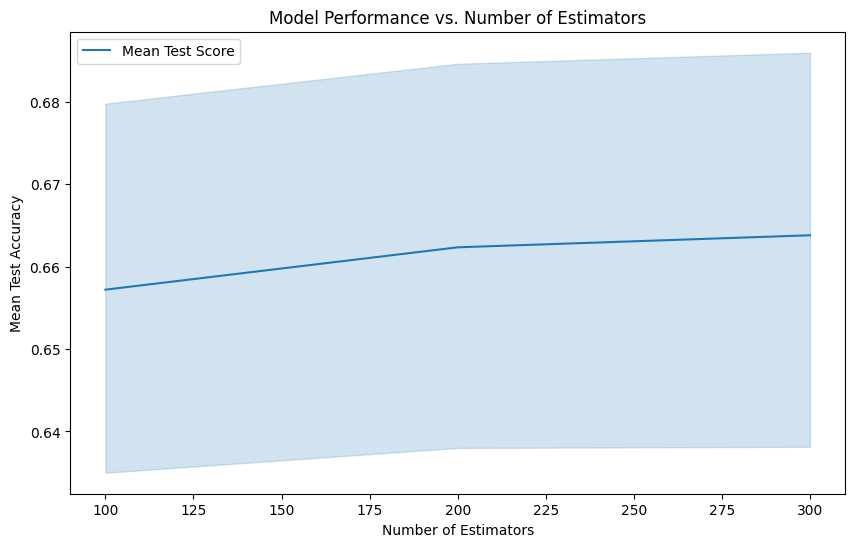

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("datasets/enhanced_resistance_data_balanced.csv")

# Separate features and target
X = data.drop(columns=["Resistance_Level"])
y = data["Resistance_Level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up Random Forest model and hyperparameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Grid search for best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Tuned Model Accuracy:", tuned_accuracy)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

labels = y.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
plot_confusion_matrix(cm, labels)

# Feature Importance
importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Test Case 1: Single Prediction
sample = X_test.iloc[0]
sample_scaled = scaler.transform([sample])
prediction = best_rf.predict(sample_scaled)
print("Test Case 1: Single Sample Prediction")
print("Input Features:")
print(sample)
print("Predicted Resistance Level:", prediction[0])

# Test Case 2: Evaluate Performance on Training Data
train_pred = best_rf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_accuracy)

# Test Case 3: Visualizing Model Performance Over Hyperparameter Tuning
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x="param_n_estimators", y="mean_test_score", label="Mean Test Score")
plt.title("Model Performance vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Accuracy")
plt.legend()
plt.show()


In [29]:

# Save the model and scaler
with open("antibiotic_resistance_model.pkl", "wb") as model_file:
    pickle.dump({"model": best_rf, "feature_names": X.columns.tolist()}, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [17]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# Save the trained scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the trained model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)


In [18]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the scaler
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)
    print(f"Loaded Scaler: {type(scaler)}")

# Load the model
with open('random_forest_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
    print(f"Loaded Model: {type(model)}")


Loaded Scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
Loaded Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [25]:
import numpy as np

# Create dummy test data (ensure it matches your model's input size)
test_data = np.zeros((1, len(scaler.mean_)))

# Scale the data
scaled_data = scaler.transform(test_data)

# Predict using the model
prediction = model.predict(scaled_data)
print("Prediction:", prediction)


Prediction: ['Susceptible']


C:\Users\Saks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
def predict_resistance():
    print("Enter the following feature values:")

    # Species
    species = {
        "Species_Clostridium difficile": 0,
        "Species_Enterococcus faecium": 0,
        "Species_Escherichia coli": 0,
        "Species_Klebsiella pneumoniae": 0,
        "Species_Mycobacterium tuberculosis": 0,
        "Species_Pseudomonas aeruginosa": 0,
        "Species_Salmonella enterica": 0,
        "Species_Staphylococcus aureus": 0
    }
    print("Select one species:")
    for i, key in enumerate(species.keys(), start=1):
        print(f"{i}. {key}")
    species_choice = int(input("Enter the number corresponding to the species: "))
    species[list(species.keys())[species_choice - 1]] = 1

    # Sample Source
    sample_source = {
        "Sample_Source_Bone": 0,
        "Sample_Source_CSF": 0,
        "Sample_Source_Eye": 0,
        "Sample_Source_Skin": 0,
        "Sample_Source_Sputum": 0,
        "Sample_Source_Urine": 0,
        "Sample_Source_Wound": 0
    }
    print("\nSelect one sample source:")
    for i, key in enumerate(sample_source.keys(), start=1):
        print(f"{i}. {key}")
    source_choice = int(input("Enter the number corresponding to the sample source: "))
    sample_source[list(sample_source.keys())[source_choice - 1]] = 1

    # Hospital Unit
    hospital_unit = {
        "Hospital_Unit_General Ward": 0,
        "Hospital_Unit_ICU": 0,
        "Hospital_Unit_Long-term Care": 0,
        "Hospital_Unit_Outpatient": 0,
        "Hospital_Unit_Surgical Unit": 0
    }
    print("\nSelect one hospital unit:")
    for i, key in enumerate(hospital_unit.keys(), start=1):
        print(f"{i}. {key}")
    unit_choice = int(input("Enter the number corresponding to the hospital unit: "))
    hospital_unit[list(hospital_unit.keys())[unit_choice - 1]] = 1

    # Antibiotic
    antibiotic = {
        "Antibiotic_Carbapenem": 0,
        "Antibiotic_Ciprofloxacin": 0,
        "Antibiotic_Colistin": 0,
        "Antibiotic_Erythromycin": 0,
        "Antibiotic_Methicillin": 0,
        "Antibiotic_Penicillin": 0,
        "Antibiotic_Tetracycline": 0,
        "Antibiotic_Vancomycin": 0
    }
    print("\nSelect one antibiotic:")
    for i, key in enumerate(antibiotic.keys(), start=1):
        print(f"{i}. {key}")
    antibiotic_choice = int(input("Enter the number corresponding to the antibiotic: "))
    antibiotic[list(antibiotic.keys())[antibiotic_choice - 1]] = 1

    # Resistance Genes
    resistance_genes = {
        "Resistance_Gene_blaCTX-M": int(input("\nPresence of blaCTX-M gene (1 for Yes, 0 for No): ")),
        "Resistance_Gene_blaKPC": int(input("Presence of blaKPC gene (1 for Yes, 0 for No): ")),
        "Resistance_Gene_mcr-1": int(input("Presence of mcr-1 gene (1 for Yes, 0 for No): ")),
        "Resistance_Gene_mecA": int(input("Presence of mecA gene (1 for Yes, 0 for No): ")),
        "Resistance_Gene_tetM": int(input("Presence of tetM gene (1 for Yes, 0 for No): ")),
        "Resistance_Gene_vanA": int(input("Presence of vanA gene (1 for Yes, 0 for No): "))
    }

    # Demographics and Attributes
    gender_male = int(input("\nGender (1 for Male, 0 for Female): "))
    region_asia = int(input("Region - Asia (1 for Yes, 0 for No): "))
    region_europe = int(input("Region - Europe (1 for Yes, 0 for No): "))
    region_north_america = int(input("Region - North America (1 for Yes, 0 for No): "))
    region_south_america = int(input("Region - South America (1 for Yes, 0 for No): "))
    mic = float(input("MIC (\u03bcg/mL): "))
    age = int(input("Age: "))
    year = int(input("Year: "))

    # Combine all inputs into a single dictionary
    user_input = {**species, **sample_source, **hospital_unit, **antibiotic, **resistance_genes,
                  "Gender_Male": gender_male,
                  "Region_Asia": region_asia,
                  "Region_Europe": region_europe,
                  "Region_North America": region_north_america,
                  "Region_South America": region_south_america,
                  "MIC (\u03bcg/mL)": mic,
                  "Age": age,
                  "Year": year}

    # Convert user input into a DataFrame
    user_df = pd.DataFrame([user_input])

    # Scale the input
    user_scaled = scaler.transform(user_df)

    # Make prediction
    prediction = best_rf.predict(user_scaled)
    print("\nPredicted Resistance Level:", prediction[0])

# Example usage
predict_resistance()

Enter the following feature values:
Select one species:
1. Species_Clostridium difficile
2. Species_Enterococcus faecium
3. Species_Escherichia coli
4. Species_Klebsiella pneumoniae
5. Species_Mycobacterium tuberculosis
6. Species_Pseudomonas aeruginosa
7. Species_Salmonella enterica
8. Species_Staphylococcus aureus


Enter the number corresponding to the species:  4



Select one sample source:
1. Sample_Source_Bone
2. Sample_Source_CSF
3. Sample_Source_Eye
4. Sample_Source_Skin
5. Sample_Source_Sputum
6. Sample_Source_Urine
7. Sample_Source_Wound


Enter the number corresponding to the sample source:  4



Select one hospital unit:
1. Hospital_Unit_General Ward
2. Hospital_Unit_ICU
3. Hospital_Unit_Long-term Care
4. Hospital_Unit_Outpatient
5. Hospital_Unit_Surgical Unit


Enter the number corresponding to the hospital unit:  3



Select one antibiotic:
1. Antibiotic_Carbapenem
2. Antibiotic_Ciprofloxacin
3. Antibiotic_Colistin
4. Antibiotic_Erythromycin
5. Antibiotic_Methicillin
6. Antibiotic_Penicillin
7. Antibiotic_Tetracycline
8. Antibiotic_Vancomycin


Enter the number corresponding to the antibiotic:  7

Presence of blaCTX-M gene (1 for Yes, 0 for No):  0
Presence of blaKPC gene (1 for Yes, 0 for No):  0
Presence of mcr-1 gene (1 for Yes, 0 for No):  1
Presence of mecA gene (1 for Yes, 0 for No):  1
Presence of tetM gene (1 for Yes, 0 for No):  0
Presence of vanA gene (1 for Yes, 0 for No):  0

Gender (1 for Male, 0 for Female):  1
Region - Asia (1 for Yes, 0 for No):  0
Region - Europe (1 for Yes, 0 for No):  0
Region - North America (1 for Yes, 0 for No):  1
Region - South America (1 for Yes, 0 for No):  0
MIC (μg/mL):  0.22
Age:  22
Year:  2023



Predicted Resistance Level: Susceptible


In [26]:
precautions = pd.read_csv("datasets/disease_precaution_plan_with_uniqueness.csv")
workout = pd.read_csv("datasets/disease_workout_plan_unique.csv")
antib = pd.read_csv('datasets/updated_antibiotics (1).csv')
diet = pd.read_csv("datasets/disease_diet_plan_unique.csv")

In [30]:
#helper function
def helper(dis):
    pre = precautions[precautions['Disease'] == dis][['Precaution 1', 'Precaution 2','Precaution 3','Precaution 4','Precaution 5']]
    pre = [col for col in pre.values]
    
    anti = antib[antib['Disease'] == dis][['Primary Antibiotic', 'Alternate Antibiotic 1','Alternate Antibiotic 2','Reason for Recommendation','Primary Antibiotic Description']]
    anti = [col for col in anti.values]
    
    die = diet[diet['Disease'] == dis][['Morning', 'Lunch','Snacks','Dinner','Night']]
    die = [col for col in die.values]
    
    work = workout[workout['Disease'] == dis][['Workout 1', 'Workout 2','Workout 3','Workout 4','Workout 5']]
    work = [col for col in work.values] 
    
    return pre,anti,die,work
    
symptoms_dict = {"abdominal_pain": 0, "abdominal_swelling": 1, "bad_breath": 2, "bleeding_gums": 3, "blood_in_sputum": 4, "bloody_stool": 5, "blue_skin": 6, "blurred_vision": 7, "body_ache": 8, "burning_urination": 9, "chest_pain": 10, "chills": 11, "cold_extremities": 12, "confusion": 13, "cough": 14, "crusting_skin": 15, "dark_urine": 16, "dehydration": 17, "delirium": 18, "diarrhea": 19, "difficulty_breathing": 20, "difficulty_swallowing": 21, "difficulty_urinating": 22, "discharge": 23, "dizziness": 24, "dry_cough": 25, "ear_pain": 26, "facial_swelling": 27, "fast_breathing": 28, "fatigue": 29, "fatigue_after_exercise": 30, "fever": 31, "frequent_urination": 32, "headache": 33, "hearing_loss": 34, "high_blood_pressure": 35, "hoarseness": 36, "increased_heart_rate": 37, "involuntary_movements": 38, "irregular_heartbeat": 39, "itching": 40, "joint_pain": 41, "light_sensitivity": 42, "loss_of_appetite": 43, "loss_of_smell": 44, "loss_of_taste": 45, "low_blood_pressure": 46, "memory_loss": 47, "muscle_weakness": 48, "nausea": 49, "night_sweats": 50, "numbness": 51, "open_wounds": 52, "painful_skin": 53, "painful_swallowing": 54, "paleness": 55, "persistent_cough": 56, "productive_cough": 57, "pus_discharge": 58, "rash_with_blisters": 59, "red_eyes": 60, "red_spots": 61, "runny_nose": 62, "seizures": 63, "shortness_of_breath": 64, "sinus_pain": 65, "skin_rash": 66, "sneezing": 67, "sore_ears": 68, "sore_throat": 69, "stiff_neck": 70, "sunken_eyes": 71, "sweating": 72, "swelling": 73, "swollen_joints": 74, "swollen_lymph_nodes": 75, "throat_tightness": 76, "tingling": 77, "tooth_pain": 78, "ulcers": 79, "unusual_bruising": 80, "vomiting": 81, "weight_loss": 82, "wheezing": 83, "yellow_skin": 84}
disease_list = {3: "bacterial_pneumonia", 26: "tuberculosis", 28: "urinary_tract_infection", 14: "lyme_disease", 1: "bacterial_conjunctivitis", 11: "gonorrhea", 24: "syphilis", 23: "strep_throat", 7: "chlamydia", 15: "meningitis", 16: "otitis_media", 4: "bacterial_skin_infection", 22: "sinusitis", 8: "cholera", 27: "typhoid_fever", 29: "whooping_cough", 12: "legionnaires_disease", 19: "scarlet_fever", 20: "septicemia", 2: "bacterial_endocarditis", 0: "anthrax", 9: "diphtheria", 18: "rheumatic_fever", 21: "shigellosis", 17: "plague", 13: "leprosy", 6: "campylobacteriosis", 5: "brucellosis", 25: "trachoma", 10: "epiglottitis"}



#mode prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))

    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return disease_list[svc.predict([input_vector])[0]]

In [31]:
# test 1 :
symptoms = input("Enter the symptoms ....")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)
pre,anti,die,work = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(pre)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for i, m_i in enumerate(anti):  # Assuming 'anti' is your iterable and 'i' is the index
    if i == 3:
        print("Reason for Recommendation:", i, m_i)
    elif i == 4:  # Example condition for a specific case
        print("Primary Antibiotic Description:", i, m_i)
    else:
        print(i, ":", m_i)


print("=================workout==================")
for w_i in die:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in work:
    print(i, ": ", d_i)
    i += 1

Enter the symptoms .... fever, cough, headache


=================predicted disease============
bacterial_endocarditis
=================description==================
[array(['Maintain proper hygiene', 'Stay hydrated',
       'Follow a balanced diet', 'Avoid exposure to known irritants',
       'Seek timely medical attention if symptoms worsen'], dtype=object)]
=================precautions==================
1 :  Maintain proper hygiene
2 :  Stay hydrated
3 :  Follow a balanced diet
4 :  Avoid exposure to known irritants
5 :  Seek timely medical attention if symptoms worsen
=================medications==================
0 : ['Vancomycin' 'Gentamicin' 'Ceftriaxone'
 'Effective for Gram-positive organisms like Streptococcus and Staphylococcus.'
 'A glycopeptide antibiotic for serious Gram-positive infections.']
=================workout==================
0 :  ['Whole grain cereals' 'Steamed vegetables with lean protein'
 'Fresh fruits like apples or oranges' 'Grilled fish with a side salad'
 'Herbal teas for hydration']
=================d

C:\Users\Saks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [32]:
predicted_disease

'bacterial_endocarditis'

In [33]:
anti = antib[antib['Disease'] == predicted_disease][['Primary Antibiotic', 'Alternate Antibiotic 1','Alternate Antibiotic 2','Primary Antibiotic Description','Primary Antibiotic Description']]
anti = [col for col in anti.values]
anti

[array(['Vancomycin', 'Gentamicin', 'Ceftriaxone',
        'A glycopeptide antibiotic for serious Gram-positive infections.',
        'A glycopeptide antibiotic for serious Gram-positive infections.'],
       dtype=object)]

In [34]:
import sklearn

In [35]:
print(sklearn.__version__)

1.6.1
